<a href="https://colab.research.google.com/github/shawnrosofsky/MITREHackathonChallengeGroup/blob/main/test_model_Shawn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Phishing URL Detection


From Wikipedia, https://en.wikipedia.org/wiki/Phishing

> Phishing is the fraudulent attempt to obtain sensitive information such as usernames, passwords and credit card details, often for malicious reasons, by disguising as a trustworthy entity in an electronic communication. The word is a neologism created as a homophone of fishing due to the similarity of using a bait in an attempt to catch a victim. The annual worldwide impact of phishing could be as high as US$5 billion.
>
> Phishing is typically carried out by email spoofing or instant messaging, and it often directs users to enter personal information at a fake website, the look and feel of which are identical to the legitimate site, the only difference being the URL of the website in concern. Communications purporting to be from social web sites, auction sites, banks, online payment processors or IT administrators are often used to lure victims. Phishing emails may contain links to websites that distribute malware.
>
> Phishing is an example of social engineering techniques used to deceive users, and it exploits weaknesses in current web security. Attempts to deal with the growing number of reported phishing incidents include legislation, user training, public awareness, and technical security measures.

Here's an example of a real phishing email sent in 2011 by attackers looking to get login credentials for Facebook users:

<pre>
LAST WARNING : Your account is reported to have violated the policies that are considered annoying or insulting Facebook users.

Until we system will disable your account within 24 hours if you do not do the reconfirmation.

Please confirm your account below:

[ Link Removed ]

Thanks.
The Facebook Team
Copyright facebook © 2011 Inc. All rights reserved.
</pre>

A victim clicking on the Phishing link would be taken to a site that looked like a pretty good copy of the Facebook login screen.

<img src="https://github.com/shawnrosofsky/MITREHackathonChallengeGroup/blob/main/images/Not_Facebook.png?raw=1">

Here are some examples of the links used in emails sent by the attackers running this phishing campaign:

**Note**: These links may be dangerous to your computer. Our practice will be to "neuter" links by wrapping certain characters with square brackets so that you cannot click on these links, or accidentally copy/paste them into your browser.

**CAUTION: DO NOT CLICK ON OR VISIT THESE LINKS!!**
<pre>
http[:]//team-welcome[.]at[.]ua/facebook-support[.]html
http[:]//reportedpages[.]at[.]ua/facebook-support-account[.]html
http[:]//www[.]facebooks[.]cloud/PayPlls[.]CEanada[.]tNZnZZlR3ZdyZZ-5RkZZDRTZZBy
http[:]//www[.]greenaura[.]net/appz[.]westpac/westpac[.]appz/login[.]php
http[:]//www[.]irastrum[.]com/wp-admin/mail[.]yahoo[.]com/
http[:]//appleid[.]apple[.]com-subscriptions[.]manager508158125[.]kevinfoley[.]com
</pre>
**CAUTION: DO NOT CLICK ON OR VISIT THESE LINKS!!**


Something smells a little phishy about these links. Given a close look by a human, you'd probably be able to decide pretty quickly if the link was really sent by Facebook or not. But billions of people get hundreds or thousands of emails each every day! How can defenders keep up with the onslaught by the phishers?

## The Problem

We want to use methods from Machine Learning to build a computer program that will automatically flag links it thinks are phishing attempts. We can do this by studying the problem, looking at data, and learning a decision rule.

The dataset we will be using is named "Phishing_Mitre_Dataset_Summer_of_AI.csv". 

#### Analyze the data, build features, or use the existing features in the data to build a model, and report your findings. We will use the F1 score to evaluate the final models using a test set that we have set aside. 

## Explore Some Data

Let's take a look at the provided features on our set of URLs. 

* Create Age (in Months): The age of the domain. If the value is -1, that information is not available or the domain has been deleted. 
* Expiry Age (in Months): The amount of months until the domain expires. If the value is negative, that information is not available or the domain has been deleted.
* Update Age (in Days): The last time the domain was updated. If the value is -1, that information is not available or the domain was deleted.
* URL: The URL of the website. Three periods have been added to the end of each URL to prevent the URL from being clicked for security purposes. 
* Label: A label to determine whether a website is a phishing link or not. 0 denotes a website that is not a phishing link, 1 denotes a website is a phishing link. 

# How to Handle URLS:


*   Length
*   Number Special characters (percert)
*   Number of slashes (split('/'))
*   Get rid of ... and http 
*   Check whether http vs https
*   number of numbers (percent)
*   .com, .net, .com.mx (suffix type)
*   number of '.' (percent)
*   number of . in first section
*   number of unique characters (percent)
*   url entropy 
*   number of alphabetical characters (percent)
*   number of hyphens (percent)
*   



In [17]:
import pandas as pd
import numpy as np
import torch
import matplotlib.pyplot as plt
import tensorflow as tf
import sklearn, skimage
from tensorflow import feature_column
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.text import Tokenizer
# import tldextract
import os
from sklearn.model_selection import train_test_split

In [76]:
file = 'Training Data/Phishing_Mitre_Dataset_Summer_of_AI.csv'
# file = 'Phishing_Mitre_Dataset_Summer_of_AI.csv'
test_file = 'Summer_of_AI_Test_Students.csv'

In [77]:
data = pd.read_csv(file)
data_test = pd.read_csv(test_file)

In [9]:
data

,create_age(months),expiry_age(months),update_age(days),URL,Label
0,-1,-1,-1,http://account-google-com.ngate.my/c44cca40176...,1
1,212,16,663,http://www.coffeespecialties.com/...,0
2,-1,-1,-1,http://black.pk/wp-content/2013/04/bp.postale/...,1
3,198,6,186,http://atomicsoda.com/manutd...,0
4,240,24,1684,http://bostoncoffeecake.com/...,0
...,...,...,...,...,...
4794,52,8,118,http://aridfoods.com/V4/MGen/F97a8a294cf7c5e90...,1
4795,-1,-1,-1,http://www.mazda.co.jp/...,0
4796,-1,-1,-1,http://www.fotografaemsaopaulo.com.br/wp-admin...,1
4797,-1,-1,-1,http://agenda.wehrensarl.ch/libraries/joomla/h...,1


In [10]:
labels = data['Label']
labels

0       1
1       0
2       1
3       0
4       0
       ..
4794    1
4795    0
4796    1
4797    1
4798    0
Name: Label, Length: 4799, dtype: int64

In [176]:
def df_to_dataset(dataframe, labels=None, shuffle=True, batch_size=32):
  dataframe = dataframe.copy()
  labels = dataframe.pop('Label')
  if labels is not None:
    ds = tf.data.Dataset.from_tensor_slices((dict(dataframe), labels))
  else:
    ds = tf.data.Dataset.from_tensor_slices(dict(dataframe))
  if shuffle:
    ds = ds.shuffle(buffer_size=len(dataframe))
  ds = ds.batch(batch_size)
  return ds

In [110]:
data_test

,create_age(months),expiry_age(months),update_age(days),URL,Label
0,200,40,114,http://www.classteacher.com/...,NaN
1,210,6,181,http://www.deadendrecords.com/...,NaN
2,98,22,81,http://www.specialisttrading.com/charts/4rfv/L...,NaN
3,-1,-1,-1,http://www.mingshun.com.tw/...,NaN
4,181,11,426,http://www.jers.com/...,NaN
...,...,...,...,...,...
1195,53,19,110,http://www.danieleconstance.com/wp-includes/js...,NaN
1196,-1,6,-1,http://topschools.hk/Zone1/login.php?.portal...,NaN
1197,24,0,668,http://shape-love.org/azziu/line/verify.html...,NaN
1198,252,24,278,http://www.chinamist.com/...,NaN


In [111]:
def process_data(data):
    dat = data.drop(columns='URL')
    https_column = list(map(lambda x: 1 if "https://" in x else 0, data["URL"]))
    dat['https'] = https_column
    stripped_strings = list(map(lambda x: x.replace("...",'').replace("http://",'').replace("https://",''), data["URL"]))
    num_chars_column = list(map(len, stripped_strings))
    dat['Length'] = num_chars_column


    first_chunks = list(map(lambda x: x.split("/")[0], stripped_strings))
    # first_chunks
    first_chunk_num_dots_column = list(map(lambda x: len(x.split("."))-1, first_chunks))

    dat['dots'] = first_chunk_num_dots_column
    num_chunks_column = list(map(lambda x: len(x.split("/")), stripped_strings))
    dat['chunks'] = num_chunks_column 
    num_nums_column = list(map(lambda x: sum(q.isdigit() for q in x)/float(len(x)), stripped_strings))
    dat['numeric characters percent'] = num_nums_column
    num_unique_chars_column = list(map(lambda x: len(set(x))/float(len(x)), stripped_strings))
    dat['unique characters percent'] = num_unique_chars_column
    num_alphas_column = list(map(lambda x: sum(q.isalpha() for q in x)/float(len(x)), stripped_strings))
    dat['alphabetical characters percent'] = num_alphas_column
    psuedo_TLD = list(map(lambda x: x.split(".")[-1], first_chunks))
    valid_TLDs = list(x for x in list(set(psuedo_TLD)) if (len(x) < 5 and (x+"0")[0].isalpha()))
    TLD_column = list(map(lambda x: valid_TLDs.index(x) if x in valid_TLDs else -1, psuedo_TLD))
    dat['TLD'] = TLD_column
    return dat

dat = process_data(data)
dat_test = process_data(data_test)

In [112]:
dat

,create_age(months),expiry_age(months),update_age(days),Label,https,Length,dots,chunks,numeric characters percent,unique characters percent,alphabetical characters percent,TLD
0,-1,-1,-1,1,0,60,2,2,0.350000,0.433333,0.566667,63
1,212,16,663,0,0,26,2,2,0.000000,0.538462,0.884615,64
2,-1,-1,-1,1,0,63,1,6,0.333333,0.365079,0.539683,41
3,198,6,186,0,0,21,1,2,0.000000,0.571429,0.904762,64
4,240,24,1684,0,0,21,1,2,0.000000,0.619048,0.904762,64
...,...,...,...,...,...,...,...,...,...,...,...,...
4794,52,8,118,1,0,63,1,5,0.301587,0.476190,0.603175,64
4795,-1,-1,-1,0,0,16,3,2,0.000000,0.687500,0.750000,69
4796,-1,-1,-1,1,0,63,3,5,0.111111,0.460317,0.761905,6
4797,-1,-1,-1,1,0,63,2,7,0.063492,0.396825,0.809524,17


In [113]:
dat_test

,create_age(months),expiry_age(months),update_age(days),Label,https,Length,dots,chunks,numeric characters percent,unique characters percent,alphabetical characters percent,TLD
0,200,40,114,NaN,0,21,2,2,0.000000,0.619048,0.857143,40
1,210,6,181,NaN,0,23,2,2,0.000000,0.521739,0.869565,40
2,98,22,81,NaN,0,63,2,4,0.015873,0.412698,0.825397,40
3,-1,-1,-1,NaN,0,20,3,2,0.000000,0.650000,0.800000,54
4,181,11,426,NaN,0,13,2,2,0.000000,0.769231,0.769231,40
...,...,...,...,...,...,...,...,...,...,...,...,...
1195,53,19,110,NaN,0,60,2,4,0.000000,0.416667,0.866667,40
1196,-1,6,-1,NaN,0,37,1,3,0.027027,0.513514,0.810811,0
1197,24,0,668,NaN,0,37,1,4,0.000000,0.567568,0.837838,10
1198,252,24,278,NaN,0,18,2,2,0.000000,0.666667,0.833333,40


In [114]:

train, val = train_test_split(dat, test_size=0.2)
train

,create_age(months),expiry_age(months),update_age(days),Label,https,Length,dots,chunks,numeric characters percent,unique characters percent,alphabetical characters percent,TLD
242,25,11,35,1,0,63,2,4,0.253968,0.444444,0.666667,64
704,226,14,8,1,0,57,4,5,0.000000,0.368421,0.842105,112
4235,244,44,865,0,0,21,2,2,0.000000,0.619048,0.857143,64
1375,25,-1,22,1,0,63,1,5,0.000000,0.333333,0.904762,64
2516,225,51,293,0,0,17,2,2,0.000000,0.705882,0.823529,64
...,...,...,...,...,...,...,...,...,...,...,...,...
3675,-1,-1,-1,1,0,63,2,4,0.238095,0.396825,0.682540,6
2566,235,5,252,0,0,17,2,2,0.000000,0.705882,0.823529,64
515,3,9,72,1,0,42,4,3,0.095238,0.428571,0.761905,64
2626,-1,-1,-1,1,1,45,1,4,0.111111,0.533333,0.800000,33


In [193]:
train

,create_age(months),expiry_age(months),update_age(days),Label,https,Length,dots,chunks,numeric characters percent,unique characters percent,alphabetical characters percent,TLD
242,25,11,35,1,0,63,2,4,0.253968,0.444444,0.666667,64
704,226,14,8,1,0,57,4,5,0.000000,0.368421,0.842105,112
4235,244,44,865,0,0,21,2,2,0.000000,0.619048,0.857143,64
1375,25,-1,22,1,0,63,1,5,0.000000,0.333333,0.904762,64
2516,225,51,293,0,0,17,2,2,0.000000,0.705882,0.823529,64
...,...,...,...,...,...,...,...,...,...,...,...,...
3675,-1,-1,-1,1,0,63,2,4,0.238095,0.396825,0.682540,6
2566,235,5,252,0,0,17,2,2,0.000000,0.705882,0.823529,64
515,3,9,72,1,0,42,4,3,0.095238,0.428571,0.761905,64
2626,-1,-1,-1,1,1,45,1,4,0.111111,0.533333,0.800000,33


In [116]:

batch_size = 12
train_ds = df_to_dataset(train, labels, batch_size=batch_size)
val_ds = df_to_dataset(val, labels, shuffle=False, batch_size=batch_size)
test_ds = df_to_dataset(test, labels, shuffle=False, batch_size=batch_size)



In [117]:
def create_model(data,target="Label"):
    df = data.copy()
    labels = df.pop(target)
    inputs = {key: tf.keras.layers.Input(shape=(), name=key) for key in df.keys()}
    x = tf.stack(list(inputs.values()), axis=-1)
    x = layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.L2(l2=0.01))(x)
    x = layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.L2(l2=0.01))(x)
    x = layers.Dropout(.1)(x)
    outputs = layers.Dense(1, name=target)(x)
    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    return model


model = create_model(dat)
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])


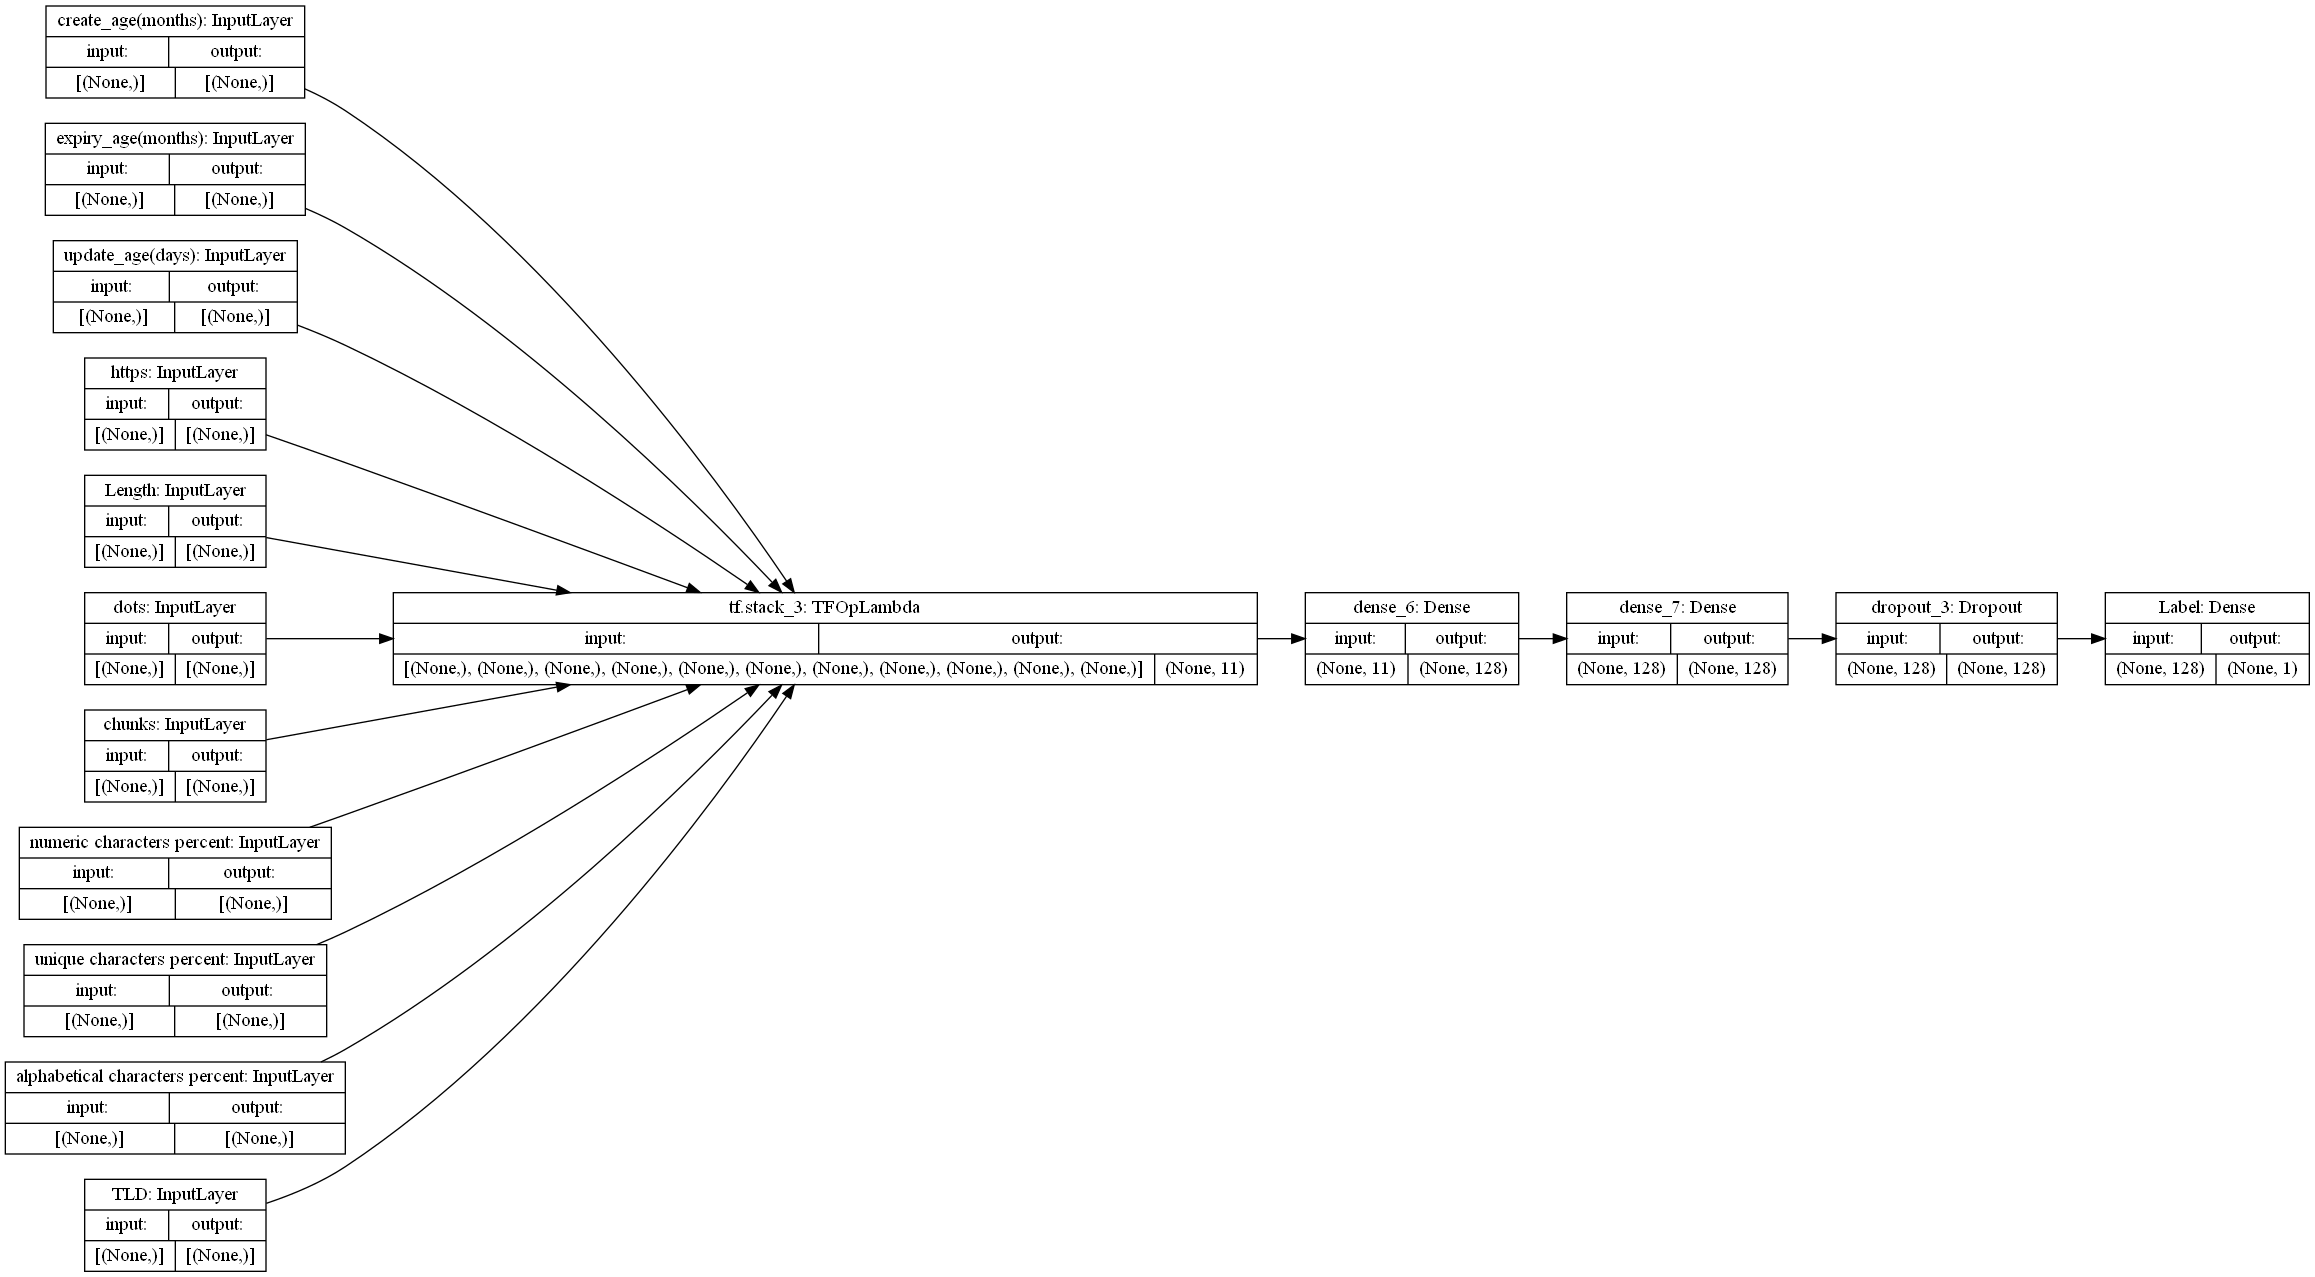

In [118]:
tf.keras.utils.plot_model(model, show_shapes=True, rankdir='LR')


In [119]:

history = model.fit(train_ds,
                   validation_data=val_ds,
                   epochs=100)
    


Epoch 1/100
320/320 [==============================] - 3s 5ms/step - loss: 3.1358 - accuracy: 0.8005 - val_loss: 1.9614 - val_accuracy: 0.8333
Epoch 2/100
320/320 [==============================] - 1s 4ms/step - loss: 1.5964 - accuracy: 0.8492 - val_loss: 1.1043 - val_accuracy: 0.8021
Epoch 3/100
320/320 [==============================] - 2s 5ms/step - loss: 1.1717 - accuracy: 0.8625 - val_loss: 0.8573 - val_accuracy: 0.8687
Epoch 4/100
320/320 [==============================] - 2s 5ms/step - loss: 0.8357 - accuracy: 0.8797 - val_loss: 0.8760 - val_accuracy: 0.8625
Epoch 5/100
320/320 [==============================] - 2s 5ms/step - loss: 0.7551 - accuracy: 0.8854 - val_loss: 0.7138 - val_accuracy: 0.8781
Epoch 6/100
320/320 [==============================] - 2s 6ms/step - loss: 0.7327 - accuracy: 0.8828 - val_loss: 0.6613 - val_accuracy: 0.8917
Epoch 7/100
320/320 [==============================] - 2s 5ms/step - loss: 0.6792 - accuracy: 0.8828 - val_loss: 0.6611 - val_accuracy: 0.8823

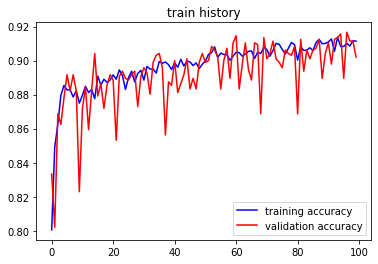

In [120]:
%matplotlib inline
epoch = history.epoch
plt.figure()
plt.plot(epoch, history.history['accuracy'], 'b-', label='training accuracy')
plt.plot(epoch, history.history['val_accuracy'], 'r-', label='validation accuracy')
plt.title('train history')
plt.legend()

In [121]:
loss, accuracy = model.evaluate(val_ds)
print("Accuracy", accuracy)


80/80 [==============================] - 0s 3ms/step - loss: 0.2528 - accuracy: 0.9021
Accuracy 0.9020833373069763


In [122]:


ds_test = df_to_dataset(dat_test, shuffle=False)

In [128]:

probabilities = tf.nn.sigmoid(model.predict(ds_test))
predictions = np.round(probability).astype(int)
predictions

array([[0],
       [0],
       [1],
       ...,
       [1],
       [0],
       [1]])

In [148]:
data_test_predictions = data_test.copy()
data_test_predictions['Label'] = predictions
data_test_predictions.to_csv("Group1_Predictions.csv", encoding='utf-8', index=False)

data_test_predictions

,create_age(months),expiry_age(months),update_age(days),URL,Label
0,200,40,114,http://www.classteacher.com/...,0
1,210,6,181,http://www.deadendrecords.com/...,0
2,98,22,81,http://www.specialisttrading.com/charts/4rfv/L...,1
3,-1,-1,-1,http://www.mingshun.com.tw/...,0
4,181,11,426,http://www.jers.com/...,0
...,...,...,...,...,...
1195,53,19,110,http://www.danieleconstance.com/wp-includes/js...,1
1196,-1,6,-1,http://topschools.hk/Zone1/login.php?.portal...,1
1197,24,0,668,http://shape-love.org/azziu/line/verify.html...,1
1198,252,24,278,http://www.chinamist.com/...,0


In [171]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

url = data['URL'].str.replace('...','',regex=False)

# construct a new vocabulary 
tk = Tokenizer(num_words=None, char_level=True, oov_token='UNK')
# print(tk.word_index)
alphabet="abcdefghijklmnopqrstuvwxyz0123456789-,;.!?:'\"/\\|_@#$%^&*~`+-=<>()[]{}é"
char_dict = {}
for i, char in enumerate(alphabet):
    char_dict[char] = i + 1
    
# Use char_dict to replace the tk.word_index
tk.word_index = char_dict 
# Add 'UNK' to the vocabulary 
tk.word_index[tk.oov_token] = max(char_dict.values()) + 1

# print(tokens)
# tk.fit_on_texts(url)
tokens = tk.texts_to_sequences(url)
print(url[0])
print(tokens[0])
vocab_len = len(tk.word_index)


http://account-google-com.ngate.my/c44cca401760e0c1e12587f9b833f8e5
[8, 20, 20, 16, 43, 46, 46, 1, 3, 3, 15, 21, 14, 20, 60, 7, 15, 15, 7, 12, 5, 60, 3, 15, 13, 40, 14, 7, 1, 20, 5, 40, 13, 25, 46, 3, 31, 31, 3, 3, 1, 31, 27, 28, 34, 33, 27, 5, 27, 3, 28, 5, 28, 29, 32, 35, 34, 6, 36, 2, 35, 30, 30, 6, 35, 5, 32]


In [217]:
# url.str.len().max()
# data['URL'].str.len().max()
token_len = 128
tokens = pad_sequences(tokens, maxlen=token_len, padding='post')
# url_tokens = url.copy()
url_tokens = pd.DataFrame({'tokens': list(tokens), 'Label': labels})
# url_tokens['tokens'] = tokens_padded
url_tokens


,tokens,Label
0,"[8, 20, 20, 16, 43, 46, 46, 1, 3, 3, 15, 21, 1...",1
1,"[8, 20, 20, 16, 43, 46, 46, 23, 23, 23, 40, 3,...",0
2,"[8, 20, 20, 16, 43, 46, 46, 2, 12, 1, 3, 11, 4...",1
3,"[8, 20, 20, 16, 43, 46, 46, 1, 20, 15, 13, 9, ...",0
4,"[8, 20, 20, 16, 43, 46, 46, 2, 15, 19, 20, 15,...",0
...,...,...
4794,"[8, 20, 20, 16, 43, 46, 46, 1, 18, 9, 4, 6, 15...",1
4795,"[8, 20, 20, 16, 43, 46, 46, 23, 23, 23, 40, 13...",0
4796,"[8, 20, 20, 16, 43, 46, 46, 23, 23, 23, 40, 6,...",1
4797,"[8, 20, 20, 16, 43, 46, 46, 1, 7, 5, 14, 4, 1,...",1


In [180]:
tokens_train, tokens_val = train_test_split(url_tokens, test_size=0.2)

In [228]:
tokens_train

,tokens,Label
4474,"[8, 20, 20, 16, 43, 46, 46, 23, 23, 23, 40, 1,...",0
3007,"[8, 20, 20, 16, 43, 46, 46, 33, 32, 40, 30, 36...",1
1485,"[8, 20, 20, 16, 43, 46, 46, 23, 23, 23, 40, 14...",0
4099,"[8, 20, 20, 16, 43, 46, 46, 28, 27, 27, 29, 32...",1
2821,"[8, 20, 20, 16, 43, 46, 46, 23, 23, 23, 40, 35...",0
...,...,...
1305,"[8, 20, 20, 16, 43, 46, 46, 23, 23, 23, 60, 1,...",0
4506,"[8, 20, 20, 16, 43, 46, 46, 1, 21, 2, 5, 18, 7...",1
2687,"[8, 20, 20, 16, 43, 46, 46, 23, 23, 23, 40, 20...",0
1185,"[8, 20, 20, 16, 43, 46, 46, 23, 23, 23, 40, 1,...",1


In [243]:
def create_character_model(data, input_key='tokens', target='Label'):
    df = data.copy()
    labels = df.pop(target)
    inputs = {key: tf.keras.layers.Input(shape=(token_len,), name=key, dtype=tf.int64) for key in df.keys()}
    x = inputs[input_key]
    # x = list(inputs.values)
    # inputs = tf.keras.Input(shape=(token_len,), name="tokens")  # Variable-length sequence of ints
    x = layers.Embedding(vocab_len, output_dim=128, input_length=token_len, mask_zero=True)(x)
    
    x = layers.Bidirectional(layers.LSTM(128 ,dropout=0.1, recurrent_dropout=0.1, kernel_regularizer=tf.keras.regularizers.L2(0.01)))(x)
    x = layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.L2(l2=0.01))(x)
    x = layers.Dropout(.1)(x)
    outputs = layers.Dense(1, name=target)(x)
    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    return model
    

model_embedding = create_character_model(tokens_train)
model_embedding.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

In [244]:
def tokens_to_dataset(tokens, labels=None, shuffle=True, batch_size=32):
  dataframe = tokens.copy()
  
  if labels is not None:
    labels = dataframe.pop('Label')
    ds = tf.data.Dataset.from_tensor_slices((list(dataframe['tokens']), labels))
  else:
    labels = dataframe.pop('Label')
    ds = tf.data.Dataset.from_tensor_slices(list(dataframe['tokens']))
  if shuffle:
    ds = ds.shuffle(buffer_size=len(list(dataframe['tokens'])))
  ds = ds.batch(batch_size)
  return ds

batch_size = 4
tokens_train_ds = tokens_to_dataset(tokens_train,labels, batch_size=batch_size)
tokens_val_ds = tokens_to_dataset(tokens_val,labels, shuffle=False, batch_size=batch_size)
tokens_test_ds = tokens_to_dataset(tokens_val, shuffle=False, batch_size=batch_size)
# tokens_train

In [245]:
# tf.data.Dataset.from_tensor_slices(list(tokens_train['tokens']))

In [246]:
model_embedding(tokens_test_ds)

TypeError: Inputs to a layer should be tensors. Got: <BatchDataset shapes: (None, 128), types: tf.int32>

In [247]:

history_embedding = model_embedding.fit(tokens_train_ds,
                                        validation_data=tokens_val_ds,
                                        epochs=10)

Epoch 1/10
 16/960 [..............................] - ETA: 9:41 - loss: 6.3849 - accuracy: 0.5625

KeyboardInterrupt: 